# Machine learning - KNN - Oscar IMDB

In [1]:
import os
import pandas as pd
import pickle


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

## Importando o Dataframe

In [3]:
with open('oscar_imdb.pkl', 'rb') as f:
    df_imdb_oscar=pickle.load(f)

In [4]:
df_imdb_oscar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444329 entries, 0 to 447056
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   titleType      444329 non-null  object 
 1   primaryTitle   444329 non-null  object 
 2   originalTitle  444329 non-null  object 
 3   startYear      444329 non-null  int64  
 4   genres         432835 non-null  object 
 5   averageRating  444329 non-null  float64
 6   numVotes       444329 non-null  int64  
 7   nominee        444329 non-null  object 
 8   winner         444329 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 33.9+ MB


### Divisão entre previsores e classe

In [5]:
X_imdb_oscar = df_imdb_oscar.iloc[:, 5:7]

In [6]:
Y_imdb_oscar_nominee = df_imdb_oscar.iloc[:, 7]

In [7]:
Y_imdb_oscar_winner = df_imdb_oscar.iloc[:, 8]

### Escalonamento dos valores

In [8]:
scaler = StandardScaler()
X_imdb_oscar = scaler.fit_transform(X_imdb_oscar)

### Tratamento de atributos categóricos

In [9]:
label_encoder = LabelEncoder()
Y_imdb_oscar_nominee = label_encoder.fit_transform(Y_imdb_oscar_nominee)
Y_imdb_oscar_winner = label_encoder.fit_transform(Y_imdb_oscar_winner)

### KNN Nominee

#### Divisão Treinamento e Teste

In [10]:
X_imdb_oscar_treinamento, X_imdb_oscar_teste, Y_imdb_oscar_nominee_treinamento, Y_imdb_oscar_nominee_teste = train_test_split(X_imdb_oscar, Y_imdb_oscar_nominee,test_size = 0.25, random_state = 0)

### Tuning dos Parâmetros com GridSearch

In [11]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree']}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros, n_jobs=8)
grid_search.fit(X_imdb_oscar, Y_imdb_oscar_nominee)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
0.99104492586383


#### Previsões 

In [11]:
knn_imdb_oscar_nominee = KNeighborsClassifier(algorithm='auto', n_neighbors=10, p=1)
knn_imdb_oscar_nominee.fit(X_imdb_oscar_treinamento,Y_imdb_oscar_nominee_treinamento);
previsoes_nominee = knn_imdb_oscar_nominee.predict(X_imdb_oscar_teste)

#### Acurácia

In [12]:
accuracy_score(Y_imdb_oscar_nominee_teste, previsoes_nominee)

0.9914208294698559

#### Matriz de Confusão 

In [13]:
confusion_matrix(Y_imdb_oscar_nominee_teste, previsoes_nominee)

array([[110054,     66],
       [   887,     76]])

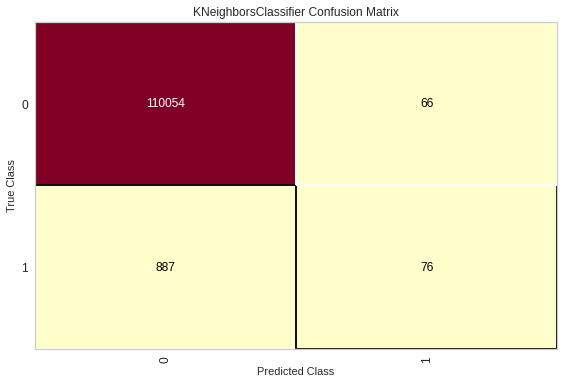

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [16]:
cm_nominee = ConfusionMatrix(knn_imdb_oscar_nominee)
cm_nominee.fit(X_imdb_oscar_treinamento,Y_imdb_oscar_nominee_treinamento)
cm_nominee.score(X_imdb_oscar_teste, Y_imdb_oscar_nominee_teste)
cm_nominee.show()

#### Claissification Report

In [15]:
print(classification_report(Y_imdb_oscar_nominee_teste, previsoes_nominee))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    110120
           1       0.54      0.08      0.14       963

    accuracy                           0.99    111083
   macro avg       0.76      0.54      0.57    111083
weighted avg       0.99      0.99      0.99    111083



### KNN Winner

#### Divisão Treinamento e Teste

In [10]:
X_imdb_oscar_treinamento, X_imdb_oscar_teste, Y_imdb_oscar_winner_treinamento, Y_imdb_oscar_winner_teste = train_test_split(X_imdb_oscar, Y_imdb_oscar_winner,test_size = 0.25, random_state = 0)

#### Tuning dos parâmetros com GridSearch

In [24]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree']}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros, n_jobs=8)
grid_search.fit(X_imdb_oscar, Y_imdb_oscar_winner)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'algorithm': 'auto', 'n_neighbors': 20, 'p': 2}
0.9974883478059094


#### Previsões 

In [11]:
knn_imdb_oscar_winner = KNeighborsClassifier(algorithm='auto', n_neighbors=20, p=2)
knn_imdb_oscar_winner.fit(X_imdb_oscar_treinamento,Y_imdb_oscar_winner_treinamento);
previsoes_winner = knn_imdb_oscar_winner.predict(X_imdb_oscar_teste)

#### Acurácia

In [12]:
accuracy_score(Y_imdb_oscar_winner_teste, previsoes_winner)

0.9974253486131991

#### Matriz de Confusão 

In [13]:
confusion_matrix(Y_imdb_oscar_winner_teste, previsoes_winner)

array([[110795,      2],
       [   284,      2]])

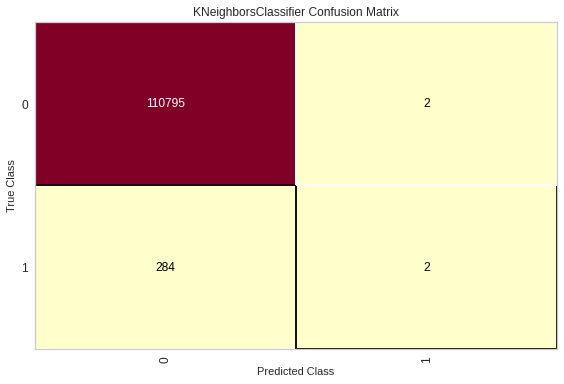

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
cm_winner = ConfusionMatrix(knn_imdb_oscar_winner)
cm_winner.fit(X_imdb_oscar_treinamento,Y_imdb_oscar_winner_treinamento)
cm_winner.score(X_imdb_oscar_teste, Y_imdb_oscar_winner_teste)
cm_winner.show()

#### Claissification Report

In [15]:
print(classification_report(Y_imdb_oscar_winner_teste, previsoes_winner))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110797
           1       0.50      0.01      0.01       286

    accuracy                           1.00    111083
   macro avg       0.75      0.50      0.51    111083
weighted avg       1.00      1.00      1.00    111083

